In [52]:
!pip install selenium


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### selenium 
- 웹 어플리케이션을 테스트하기 위한 라이브러리
- python code를 이용하여 웹 브라이져를 제어

In [53]:
from selenium import webdriver

In [54]:
# 웹 브라우져 오픈: 해당 웹 브라우져를 변수로 지정
driver=webdriver.Chrome()

In [55]:
# 웹 브라우져에서 naver 접속
driver.get('https://naver.com')

#### selenium에서 tag에 접근
- find_element()
    - html문서에서 특정 태그를 검색 -> 그중에 첫번째 태그를 선택
    - BeautiFulSoup의 find() 흡사
- finf_elements()
    - html 문서에서 특정 태그를 모두 검색
    - BeautiFulSoup의 find_all() 흡사 

In [56]:
# By: 태그에 접근하기 편한 기능을 가지고 있는 class
from selenium.webdriver.common.by import By

# Keys: 키보드의 이벤트를 담당하는 class
from selenium.webdriver.common.keys import Keys

In [57]:
# 네이버 메인 화면에서 검색어를 입력하는 input 태그를 선택
# id가 query인 태그
search_element=driver.find_element(By.ID, 'query')

In [58]:
search_element

<selenium.webdriver.remote.webelement.WebElement (session="c179495f278f52b97e03a9b57c85d9ea", element="f.4EE14900C5E63FC15AAEB4D0D38E2AF4.d.4BA2A677FDF76162ED23EFCB0D746797.e.4")>

In [59]:
# 검색어 창에 특정 단어를 입력
search_element.send_keys('비타500')

In [60]:
# 검색어 창에서 ENTER 이벤트 발생
search_element.send_keys(Keys.ENTER)

In [61]:
# id가 lnb 인 태그를 선택
lnb_element = driver.find_element(
    By.ID, 'lnb'
)

In [62]:
# 쇼핑 탭의 element를 선택
# div 태그 중 role 속성의 값이 tablist인
len(
    lnb_element.find_elements(
        By.CSS_SELECTOR, 
        'div[role="tablist"]'
    )
)

1

In [63]:
menu_element=lnb_element.find_element(
        By.CSS_SELECTOR,
        'div[role="tablist"]'
    )

In [64]:
# 메뉴 탭에서 쇼핑 탭 태그를 선택
menu_element.find_element(
    By.LINK_TEXT, 
    '쇼핑'
).click()

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/127.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="비타500 : 네이버 검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'비타500\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'비타500\'의 네이버 검색 결과입니다."> <title>비타500 : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240801.css"> 
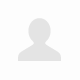
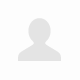

In [65]:
# 현재 driver 변수에 html 코드를 로드
driver.page_source

In [66]:
from bs4 import BeautifulSoup as bs

In [67]:
soup =bs(driver.page_source, 'html.parser')

In [68]:
soup.title

<title>비타500 : 네이버 검색</title>

In [69]:
# driver에 존재하고 있는 모든 탭의 주소를 출력
driver.window_handles

['4EE14900C5E63FC15AAEB4D0D38E2AF4', '9F69219F9CE8F417B4D9A40076E6C6AA']

In [70]:
# driver에서 탭을 이동
driver.switch_to.window(driver.window_handles[1])

In [94]:
bs(driver.page_source, 'html.parser').title

<title>비타500 : 네이버 쇼핑</title>

In [72]:
import time

In [95]:
# driver에서 스크롤을 가장 하단으로 내린다.
try:
    lsat_scroll=driver.execute_script("return document.body.scrollHeight")

    # 반복문 사용 (반복 횟수가 불분명할 때)
    while True:
        # 스크롤을 가장 마지막으로 이동
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 잠시 대기하는 코드: 오류가 발생하면 더 길게 잡는다.
        time.sleep(2)

        # 스크롤을 내린 뒤 다시 한 번 화면의 높이를 측정
        new_scroll = driver.execute_script("return document.body.scrollHeight")

        # last_scroll과 new_scroll 비교
        if new_scroll==lsat_scroll:
            # 반복문을 종료
            break
        else:
            lsat_scroll=new_scroll
except Exception as e:
    print("Error code:", e)

In [103]:
# bs를 이용해서 html에서 img 태그 안에 src 속성을 모두 가지고 온다.

# PARSING
soup=bs (driver.page_source, 'html.parser')

In [104]:
# div 태그 중 class가 product_item__MDtDF 인 태그를 모두 찾는다.
product_list=soup.find_all('div',attrs={
    'class':'product_item__MDtDF'
})

In [105]:
len(product_list)

40

In [106]:
# product_list에서 첫번째 태그를 기준으로 테스트
# img: 이미지, svg: 아이콘
len(
    product_list[0].find_all('img')

)

2

In [107]:
# div 중 class가 product_img_area__cUrko 인 태그를 선택
img_tag=product_list[0].find('div', attrs={
    'class':'product_img_area__cUrko'
})

In [108]:
img_tag.find('img')

<img alt="광동 비타500 비타오백 박스 비타민음료 비타음료 자양강장제 피로회복제 50병" height="140" src="https://shopping-phinf.pstatic.net/main_8578201/85782019184.jpg?type=f140" width="140"/>

In [109]:
img_url=img_tag.find('img')['src']

In [111]:
import requests
import os

In [115]:
# 이미지를 pc에 저장하는 함수 생성
def img_save(img_path, save_path, file_name):
    # file_name에 '/'는 제거
    file_name=file_name.replace('/','')
    html_data=requests.get(img_path)
    ImageFile=open(
        os.path.join(
            save_path,
            file_name
        ),
        'wb'
    )

    # 이미지의 데이터 크기를 지정
    chunk_size = 100000000
    for chunk in html_data.iter_content(chunk_size):
        ImageFile.write(chunk)
        ImageFile.close()

    print(f'{file_name} 파일 저장 완료')

In [117]:
img_save(img_url, './img', 'test.png')

test.png 파일 저장 완료


In [118]:
# product_list에서 첫번째 태그를 기준으로 반복문을 실행하여 이미지를 저장
for product in product_list:
    img_tag=product.find('div', attrs={
    'class':'product_img_area__cUrko'
    })
    img_url=img_tag.find('img')['src']
    file_name=img_tag.find('img')['alt']+'.png'
    img_save(img_url, "./img", file_name)

광동 비타500 비타오백 박스 비타민음료 비타음료 자양강장제 피로회복제 50병.png 파일 저장 완료
비타500 100ml 30병 (4종 택1) + 비타500 제로 증정 (10병).png 파일 저장 완료
광동 비타500캔 스파클링 제로 피지라임 240ml 각6개씩 총24개 캔음료 비타민음료.png 파일 저장 완료
광동제약 광동 비타500 100ml.png 파일 저장 완료
[광동제약] 비타500 x 20병(1BOX) 선물용선물용케이스서비스.png 파일 저장 완료
광동제약 광동 비타500 프레쉬 100ml.png 파일 저장 완료
비타500 허니로열 곰돌이 푸 에디션 100ml.png 파일 저장 완료
광동 비타500 프레시 fresh  100ml  100개.png 파일 저장 완료
광동제약 광동 비타500 칼슘 100ml.png 파일 저장 완료
광동 비타500 선물세트 드링크 비타민음료 20병x3케이스 선물용케이스 안전박스포장.png 파일 저장 완료
(정기 구독) 비타500 100ml 100병(50병+50병).png 파일 저장 완료
약국 광동 비타500 에이스 100ml 50병 마시는 비타민C음료 선물용 박스.png 파일 저장 완료
상일 광동 비타500 제로 스파클링 250ml.png 파일 저장 완료
광동제약 광동 비타500 로열폴리스 120ml.png 파일 저장 완료
박카스F 비타500 오로나민c 미에로화이바 비타천 각 10병씩 50병 자양강장제 사무실드링크.png 파일 저장 완료
대웅생명과학 비타500 치어팩 250ml.png 파일 저장 완료
광동 비타500 제로 100ml (20개) 카리나 2차 포토카드1set 대량 구매.png 파일 저장 완료
상일 광동 비타500 스파클링 제로 유자 250ml.png 파일 저장 완료
광동 비타500 240ml x 30캔.png 파일 저장 완료
(광동 직영) 비타500 제로 잔망루피 에디션 100ml 20입 세트 + 무드등1개.png 파일 저장 완료
비타 500 치어팩 비타민 음료 250ml 30개 파우치 광동 드링크.png 파

In [119]:
# 상품의 이름과 상품의 가격을 출력
product_list2=soup.find_all('div',attrs={
    'class':'product_info_area__xxCTi'
})

In [121]:
values=[]
for product in product_list2:
    # 상품의 이름은 div 중 class가 product_title__Mmw2K 에 존재
    item_name=product.find('div', attrs={
                                'class':'product_title__Mmw2K'
                            }).get_text()
    # 상품의 가격은 span 태그 중 class가 price인 태그의 문자
    item_price=product.find('span', attrs={
                                'class':'price'
                            }).get_text()
    values.append(
        [item_name, item_price]
    )

In [122]:
values

[['광동 비타500 비타오백 박스 비타민음료 비타음료 자양강장제 피로회복제 50병', '25,900원'],
 ['비타500 100ml 30병 (4종 택1) + 비타500 제로 증정 (10병)', '16,900원'],
 ['광동 비타500캔 스파클링 제로 피지라임 240ml 각6개씩 총24개 캔음료 비타민음료', '18,800원'],
 ['광동제약 광동 비타500 100ml', '최저450원'],
 ['[광동제약] 비타500 x 20병(1BOX) /선물용/선물용케이스/서비스', '11,100원'],
 ['광동제약 광동 비타500 프레쉬 100ml', '최저2,000원'],
 ['비타500 허니로열 곰돌이 푸 에디션 100ml', '최저14,890원'],
 ['광동 비타500 프레시 fresh  100ml  100개', '46,530원'],
 ['광동제약 광동 비타500 칼슘 100ml', '최저530원'],
 ['광동 비타500 선물세트 드링크 비타민음료 20병x3케이스 선물용케이스 안전박스포장', '37,400원'],
 ['(정기 구독) 비타500 100ml 100병(50병+50병)', '48,300원'],
 ['약국 광동 비타500 에이스 100ml 50병 마시는 비타민C음료 선물용 박스', '24,800원'],
 ['상일 광동 비타500 제로 스파클링 250ml', '최저16,092원'],
 ['광동제약 광동 비타500 로열폴리스 120ml', '최저580원'],
 ['박카스F 비타500 오로나민c 미에로화이바 비타천 각 10병씩 50병 자양강장제 사무실드링크', '29,900원'],
 ['대웅생명과학 비타500 치어팩 250ml', '최저1,000원'],
 ['광동 비타500 제로 100ml (20개) 카리나 2차 포토카드1set 대량 구매', '16,770원'],
 ['상일 광동 비타500 스파클링 제로 유자 250ml', '최저16,900원'],
 ['광동 비타500 240ml x 30캔', '14,260원'],
 ['(광동 직영) 비타500 제로 